In [18]:
def run_all_tests():
    particle_class_test()
    two_body_decay_test()
    neutral_particle_path_test()
    charged_particle_path_test()
    
run_all_tests()

# Particle class, Two body decay, and Neutral particle paths work
# Charged particle path does not

Particle Class Tests Passed
Particle: pip, Mass: 0.135 GeV/c**2, Charge: 1, Lifetime: 2.0 s, Energy: 1.22137083333 GeV, Momentum: 1.21388702626 GeV/c
Particle: Km, Mass: 1.3 GeV/c**2, Charge: -1, Lifetime: 3.0 s, Energy: 1.77862916667 GeV, Momentum: 1.21388702626 GeV/c
Two Body Decay Tests Passed
Neutral Particle Path tests passed


C:\Users\Anthony\Anaconda\lib\site-packages\IPython\kernel\__main__.py:18: RuntimeWarning: invalid value encountered in sqrt


AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 5
 DESIRED: 2.0921569113698721

In [19]:
import numpy as np
from __future__ import division

class Particle:

    def __init__(self,name,x,y,z,vx,vy,vz,m,q,t):
        self.__name = name
        self.__x = x 
        self.__y = y
        self.__z = z
        self.__vx = vx
        self.__vy = vy
        self.__vz = vz
        self.__v = np.sqrt(vx[0]**2+vy[0]**2+vz[0]**2)
        self.__m = float(m)
        self.__q = q 
        self.__t = float(t)
        self.__gamma = float(1/np.sqrt(1-(self.__v)**2))
        self.__px = []
        self.__py = []
        self.__pz = []
        for i in range(len(vx)):
            self.__px.append(self.__gamma * self.__m * self.__vx[i])
            self.__py.append(self.__gamma * self.__m * self.__vy[i])
            self.__pz.append(self.__gamma * self.__m * self.__vz[i])
        self.__p = np.sqrt(self.__px[0]**2+self.__py[0]**2+self.__pz[0]**2)
        
    def name(self):
        return self.__name
        
    def x(self):
        return self.__x
        
    def y(self):
        return self.__y
        
    def z(self):
        return self.__z
    
    
    def vx(self):
        return self.__vx
        
    def vy(self):
        return self.__vy
        
    def vz(self):
        return self.__vz   
        
    def v(self):
        return self.__v
        
        
    def gamma(self):
        return self.__gamma
    
    def mass(self):
        return self.__m
        
    def charge(self):
        return self.__q
        
    def lifetime(self):
        return self.__t
        
    def px(self):
        return self.__px
        
    def py(self):
        return self.__py
        
    def pz(self):
        return self.__pz
        
    def p(self):
        return self.__p

    def set_p4(self, Px, Py, Pz, E):
        pass
    
    def e(self):
        return np.sqrt(self.__p**2+self.__m**2)
    
    def array(self):
        return [self.__x[-1], self.__vx[-1], self.__y[-1], self.__vy[-1], self.__z[-1], self.__vz[-1], self.__m, self.__q]
    
    def __str__(self):
        return 'Particle: {}, Mass: {} GeV/c**2, Charge: {}, Lifetime: {} s, Energy: {} GeV, Momentum: {} GeV/c'.format(
            self.__name, self.__m, self.__q, self.__t, self.e(), self.__p)
                
D0 = Particle('D0',[0],[0],[0],[.1],[.1],[.1],3.0,0,1.1)
print(D0.px())
print(D0.p())
print(D0.v())
print(D0)

[0.3046038495400858]
0.527589343584
0.173205080757
Particle: D0, Mass: 3.0 GeV/c**2, Charge: 0, Lifetime: 1.1 s, Energy: 3.0460384954 GeV, Momentum: 0.527589343584 GeV/c


In [20]:
import numpy.testing as test

def particle_class_test():
    D0 = Particle('D0',[0],[0],[0],[.4],[.4],[.4],3.0,0,1.1)
    # Check gamma
    test.assert_almost_equal(1.3867504905639025, D0.gamma())
    # Check particle's velocity
    test.assert_almost_equal(.692820323028, D0.v())
    # Check particle's momentum
    test.assert_almost_equal(2.88230676849,D0.p())
    
    print('Particle Class Tests Passed')
    
particle_class_test()



Particle Class Tests Passed


In [21]:
import numpy as np
import random

# This function should randomly generate the chain of decays that will occur and print them in a nested list
# The two elements are both lists who's first element is the particles created in the collision of e+ e-
# ie if D0 and D0 bar were produced in the e+ e- collision and decayed to K- pi+ and K+ pi- respectively it would print
# [['D0', ['K-', 'pi+']], ['D0_bar', ['K+', 'pi-']]]

def decaychain():
    particles = []
    if random.random() < .5:
        particles.append(['D0'])
        particles.append(['D0_bar'])
        if random.random()<.75:
            particles[0].append(['K+','pi-'])
        else:
            particles[0].append(['K-','pi+'])
        if random.random()<.75:
            particles[1].append(['K+','pi-'])
        else:
            particles[1].append(['Ks','pi0'])
    else:
        particles.append(['D+'])
        particles.append(['D-'])
        if random.random()<.75:
            particles[0].append(['Ks','pi+'])
        else:
            particles[0].append(['K+','pi0'])
        if random.random()<.75:
            particles[1].append(['Ks','pi-'])
        else:
            particles[1].append(['K-','pi0'])

    print(particles)

decaychain()

[['D0', ['K-', 'pi+']], ['D0_bar', ['K+', 'pi-']]]


In [22]:
def two_body_decay(parent,daughter1,daughter2):
    """
    This function will take a particle and make it decay to two daughter particles
    while conserving energy and momentum relativistically.
    
    Inputs
    ------
    particle  -- Initial particle we want to decay.  [Particle Object]
    duaghter1 -- First daughter particle.  [Same as above, but information like its position, velocity, etc. will be unknown]
    duaghter2 -- Second daughter particle.  [Same as above]
    
    Outputs
    -------
    duaghter1 -- First daughter particle.  [Same as above, but information like its position, velocity, etc. will now be known]
    duaghter2 -- Second daughter particle.  [Same as above]
    
    Notes
    -----

    """
    import numpy as np
    import random
    
    e_init = parent.e()
    p_init = parent.e()
    
    m = parent.mass()
    m1 = daughter1.mass()
    m2 = daughter2.mass()
    
    # Check if decay is possible
    if m < (m1+m2):
        print('Daughter particles have greater mass than parent')
        return
    
    # C.o.M. Frame energies and momenta
    e1 = (m*m + m1*m1 - m2*m2) / (2.0*m)
    e2 = (m*m - m1*m1 + m2*m2) / (2.0*m)
    P  = np.sqrt(e1*e1 - m1*m1)
    
    # Get angles
    theta = np.arccos( 2.0*random.random() - 1.0 )
    phi   = 2.0 * np.pi * random.random()

    # Calculate Momenta
    pX = P*np.sin(theta)*np.cos(phi)
    pY = P*np.sin(theta)*np.sin(phi)
    pZ = P*np.cos(theta)
    
    betax1 = pX / e1
    betay1 = pY / e1
    betaz1 = pZ / e1
    beta12 = betax1*betax1 + betay1*betay1 + betaz1*betaz1
    gamma1 = 1.0/np.sqrt(1.0-beta12)
    
    betax2 = pX / e2
    betay2 = pY / e2
    betaz2 = pZ / e2
    beta22 = betax2*betax2 + betay2*betay2 + betaz2*betaz2
    gamma2 = 1.0/np.sqrt(1.0-beta22)
    
    # Calculate Velocity from momentum
    vX1 = [pX / (m1*gamma1)]
    vY1 = [pY / (m1*gamma1)]
    vZ1 = [pZ / (m1*gamma1)]
    
    vX2 = [pX / (m2*gamma2)]
    vY2 = [pY / (m2*gamma2)]
    vZ2 = [pZ / (m2*gamma2)]
    
    X = [parent.x()[-1]]
    Y = [parent.y()[-1]]
    Z = [parent.z()[-1]]
    
    name1 = daughter1.name()
    name2 = daughter2.name()    
    
    q1 = daughter1.charge()
    q2 = daughter2.charge()
    
    t1 = daughter1.lifetime()
    t2 = daughter2.lifetime()
    
    daughter1 = Particle(name1,X,Y,Z,vX1,vY1,vZ1,m1,q1,t1)
    daughter2 = Particle(name2,X,Y,Z,vX2,vY2,vZ2,m2,q2,t2)
    return parent, daughter1, daughter2




In [73]:
def two_body_decay_test():
    D0 = Particle('D0',[1,5],[1,4],[1,8],[.9],[.1],[.01],3.0,0,1.1)
    pi_plus = Particle('pip',[0],[0],[0],[.01],[.01],[.01],.135,1,2.0)
    K_minus = Particle('Km',[0],[0],[0],[.01],[.01],[.01],1.3,-1,3.0)

    D0, pi_plus, K_minus = two_body_decay(D0,pi_plus,K_minus)
    
    # Check for equal momenta
    test.assert_almost_equal(pi_plus.p(), K_minus.p())
    # Check for correct initial position
    test.assert_almost_equal(pi_plus.x()[0], K_minus.x()[0], D0.x()[-1])
    test.assert_almost_equal(pi_plus.y()[0], K_minus.y()[0], D0.y()[-1])
    test.assert_almost_equal(pi_plus.z()[0], K_minus.z()[0], D0.z()[-1])
    # Check for correct energy
    test.assert_almost_equal(pi_plus.e(), 1.2213708333)
    test.assert_almost_equal(K_minus.e(), 1.7786291667)
    
    print(pi_plus)
    print(K_minus)
    print('Two Body Decay Tests Passed')
    
    
two_body_decay_test()

Particle: pip, Mass: 0.135 GeV/c**2, Charge: 1, Lifetime: 2.0 s, Energy: 1.22137083333 GeV, Momentum: 1.21388702626 GeV/c
Particle: Km, Mass: 1.3 GeV/c**2, Charge: -1, Lifetime: 3.0 s, Energy: 1.77862916667 GeV, Momentum: 1.21388702626 GeV/c
Two Body Decay Tests Passed


In [67]:
def boost(parent, daughter):
    '''
    Performs a Lorentz Boost into the rest frame of a particle. Use on daughters to get from C.o.M. frame to Lab frame
    
    Inputs
    ------
    parent  -- Particle whose rest frame we want to boost to.  [Particle Object]
    daughter -- Particle who is being boosted
    
    Outputs
    -------
    daughter -- Particle after being boosted
    
    Notes
    -----
    
    '''
    
    name = daughter.name()
    m = daughter.mass()
    q = daughter.charge()
    t = daughter.lifetime()
    
    betax = parent.px()[-1] / parent.e()
    betay = parent.py()[-1] / parent.e()
    betaz = parent.pz()[-1] / parent.e()
    beta2 = betax*betax + betay*betay + betaz*betaz
    gamma = 1.0/np.sqrt(1.0-beta2)
    dot   = betax*daughter.px()[-1] + betay*daughter.py()[-1] + betaz*daughter.pz()[-1]
    prod  = gamma*( gamma*dot/(1.0+gamma) + daughter.e() )

    pX = daughter.px()[-1] + betax*prod
    pY = daughter.py()[-1] + betay*prod
    pZ = daughter.pz()[-1] + betaz*prod
    e  = gamma*(daughter.e() + dot)
    
    vX = [pX / (m*daughter.gamma())]
    vY = [pY / (m*daughter.gamma())]
    vZ = [pZ / (m*daughter.gamma())]
    
    X = [parent.x()[-1]]
    Y = [parent.y()[-1]]
    Z = [parent.z()[-1]]
    
    daughter = Particle(name,X,Y,Z,vX,vY,vZ,m,q,t)
    
    return daughter

D0 = Particle('D0',[1,5],[1,4],[1,8],[.01],[.1],[.01],3.0,0,1.1)
pi_plus = Particle('pip',[0],[0],[0],[.01],[.01],[.01],.135,1,2.0)
K_minus = Particle('Km',[0],[0],[0],[.01],[.01],[.01],1.3,-1,3.0)

D0, pi_plus, K_minus = two_body_decay(D0,pi_plus,K_minus)

print(pi_plus)
print(K_minus)
pi_plus = boost(D0,pi_plus)
K_minus = boost(D0, K_minus)
print(pi_plus)
print(K_minus)

Particle: pip, Mass: 0.135 GeV/c**2, Charge: 1, Lifetime: 2.0 s, Energy: 1.22137083333 GeV, Momentum: 1.21388702626 GeV/c
Particle: Km, Mass: 1.3 GeV/c**2, Charge: -1, Lifetime: 3.0 s, Energy: 1.77862916667 GeV, Momentum: 1.21388702626 GeV/c
Particle: pip, Mass: 0.135 GeV/c**2, Charge: 1, Lifetime: 2.0 s, Energy: 1.04740396292 GeV, Momentum: 1.03866744511 GeV/c
Particle: Km, Mass: 1.3 GeV/c**2, Charge: -1, Lifetime: 3.0 s, Energy: 1.77896015484 GeV, Momentum: 1.21437194982 GeV/c


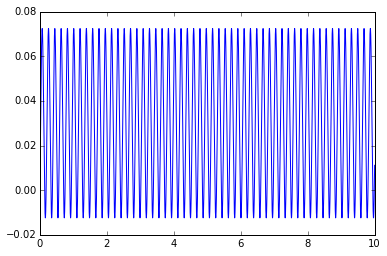

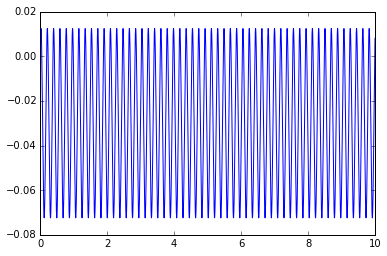

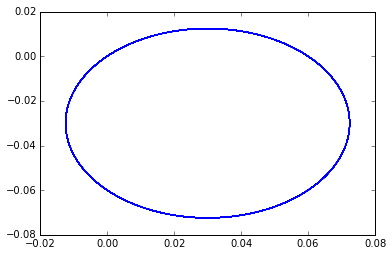

"\nTrying to look at 3d plot\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nAxes3D.plot(D0_path[:,0],D0_path[:,2],zs=D0_path[:,4])\n"

In [65]:
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

# dx/dt = vx
# dvx/dt = 0
# dy/dt = vy
# dvy/dt = vy*q*B/m
# dz/dt = vz
# dvz/dt = vz*q*B/m

def path(particle,t,B=1):
    x,vx,y,vy,z,vz,m,q = particle[0],particle[1],particle[2],particle[3],particle[4],particle[5],particle[6],particle[7]
    # force on charged particle = q*vperp*B
    # Our B field is in the x direction
    return np.array([vx, 0, vy, vz*q*B/m, vz, -vy*q*B/m])

D_plus = Particle('D+',[0],[0],[0],[.01],[.01],[.01],3.0,1,1.1)
#print(D0.x())
t_array = np.linspace(0,1000,100000)

D_plus_path = scipy.integrate.odeint(path, D_plus.array(), t_array)



plt.plot(D_plus_path[:,0],D_plus_path[:,2])
plt.show()
plt.plot(D_plus_path[:,0],D_plus_path[:,4])
plt.show()
plt.plot(D_plus_path[:,2],D_plus_path[:,4])
plt.show()

'''
Trying to look at 3d plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot(D0_path[:,0],D0_path[:,2],zs=D0_path[:,4])
'''




In [26]:
def neutral_particle_path_test():
    D0 = Particle('D0',[0],[0],[0],[.9],[.5],[.4],3.0,0,1.1)
    t_array = np.linspace(0,10,100)
    D0_path = scipy.integrate.odeint(path, D0.array(), t_array)
    # Check final position
    test.assert_almost_equal(9,D0_path[-1,0])
    test.assert_almost_equal(5,D0_path[-1,2])
    test.assert_almost_equal(4,D0_path[-1,4])
    # Check final velocity
    test.assert_almost_equal(.9,D0_path[-1,1])
    test.assert_almost_equal(.5,D0_path[-1,3])
    test.assert_almost_equal(.4,D0_path[-1,5])
    
    print('Neutral Particle Path tests passed')
    
neutral_particle_path_test()

def charged_particle_path_test():
    D_plus = Particle('D+',[0],[0],[0],[.9],[.5],[.4],3.0,1,1.1)
    t_array = np.linspace(0,10,100)
    D_plus_path = scipy.integrate.odeint(path, D_plus.array(), t_array)
    # Check final position
    test.assert_almost_equal(9,D_plus_path[-1,0])
    test.assert_almost_equal(5,D_plus_path[-1,2])
    test.assert_almost_equal(4,D_plus_path[-1,4])
    # Check final velocity
    test.assert_almost_equal(.9,D_plus_path[-1,1])
    test.assert_almost_equal(.5,D_plus_path[-1,3])
    test.assert_almost_equal(.4,D_plus_path[-1,5])
    
    print('Charged Particle Path tests passed')

charged_particle_path_test()

Neutral Particle Path tests passed


C:\Users\Anthony\Anaconda\lib\site-packages\IPython\kernel\__main__.py:18: RuntimeWarning: invalid value encountered in sqrt


AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 5
 DESIRED: 2.0921569113698721

In [70]:
mass_dict = {'D0': 1864.84, 'D+': 1869.61, 'D-': 1869.61,
             'Ks': 497.611, 'Kl': 497.611, 'K+': 493.677, 'K-': 497.677,
             'pi0': 134.9766, 'pi+': 139.57018, 'pi-': 139.57018,
             'rho': 775.26, 'rho+': 775.26, 'rho-': 775.26,
             'e+': .510999, 'e+': .510999,
             'mu': 105.6584, 'mu+': 105.6584, 'mu-': 105.6584}

# Need to figure out time units
'''life_dict = {'D0': , 'D+': , 'D-': ,
             'Ks': , 'Kl': , 'K+': , 'K-': ,
             'pi0': , 'pi+': , 'pi-': ,
             'rho': , 'rho+': , 'rho-': ,
             'e+': , 'e+': ,
             'mu': , 'mu+': , 'mu-': }'''

"life_dict = {'D0': , 'D+': , 'D-': ,\n             'Ks': , 'Kl': , 'K+': , 'K-': ,\n             'pi0': , 'pi+': , 'pi-': ,\n             'rho': , 'rho+': , 'rho-': ,\n             'e+': , 'e+': ,\n             'mu': , 'mu+': , 'mu-': }"

In [109]:
mass_dict['K+']

493.677